In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Regression Task
Customer Purchasing Behaviors

The dataset was uploaded to Kaggle on 2024 by the user Han Aksoy.

This dataset aligns with UNSDG 12: Responsible Consumption and Production and UNSDG 8: Decent Work and Economic Growth.

Attribute Information:

1. customer_id: Unique ID of the customer.
2. age: The age of the customer.
3. annual_income: The customer's annual income (in USD).
4. purchase_amount: The total amount of purchases made by the customer (in USD).
5. purchase_frequency: Frequency of customer purchases (number of times per year).
6. region: The region where the customer lives (North, South, East, West).
7. loyalty_score: Customer's loyalty score (a value between 0-100).

This dataset could help answer :

"What factors (age, annual income, loyalty score, or region) have the greatest impact on customer purchase frequency?"

"What are the key determinants of a high loyalty_score?"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Concepts of Technology of AI/final assessment/Customer Purchasing Behaviors.csv')

In [ ]:
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())

Dataset Shape: (238, 7)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB
None


In [ ]:
print("First 5 Rows:")
print(df.head())

First 5 Rows:
   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


In [ ]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   57407.563025       425.630252       6.794118   
std     68.848868    9.351118   11403.875717       140.052062       1.899047   
min      1.000000   22.000000   30000.000000       150.000000       3.000000   
25%     60.250000   31.000000   50000.000000       320.000000       5.500000   
50%    119.500000   39.000000   59000.000000       440.000000       7.000000   
75%    178.750000   46.750000   66750.000000       527.500000       8.275000   
max    238.000000   55.000000   75000.000000       640.000000       9.500000   

       purchase_frequency  
count          238.000000  
mean            19.798319  
std              4.562884  
min             10.000000  
25%             17.000000  
50%             20.000000  
75%             23.000000  
max             28.000000  


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


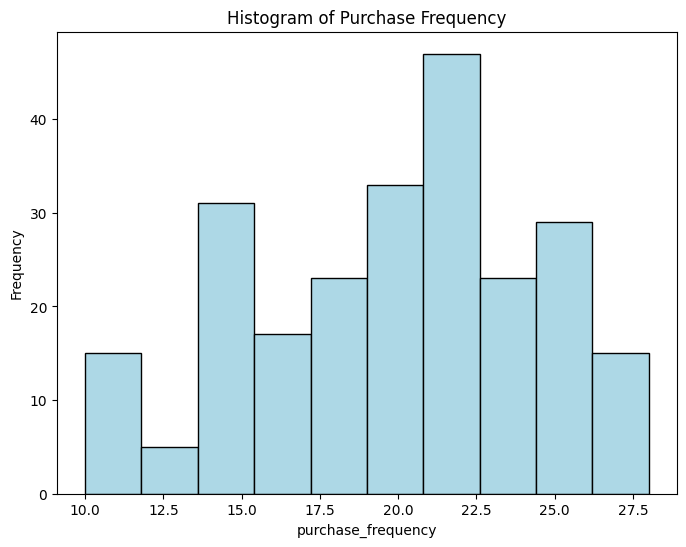

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['purchase_frequency'], bins=10, color='lightblue', edgecolor='black')
plt.title("Histogram of Purchase Frequency")
plt.xlabel("purchase_frequency")
plt.ylabel("Frequency")
plt.show()
# Insight: Histograms help reveal the distribution

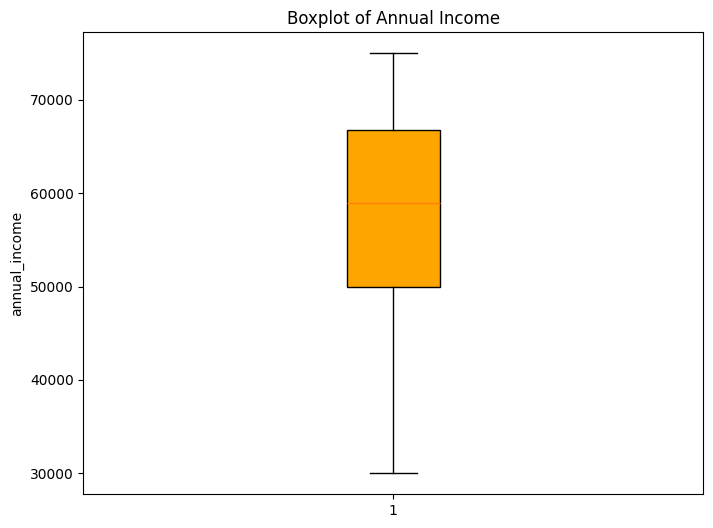

In [ ]:
# (b) Boxplots for Numeric Variables to Detect Outliers
plt.figure(figsize=(8,6))
plt.boxplot(df['annual_income'], patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title(f"Boxplot of Annual Income")
plt.ylabel('annual_income')
plt.show()
# Insight: Boxplots highlight the median, quartiles, and potential outliers in each variable.

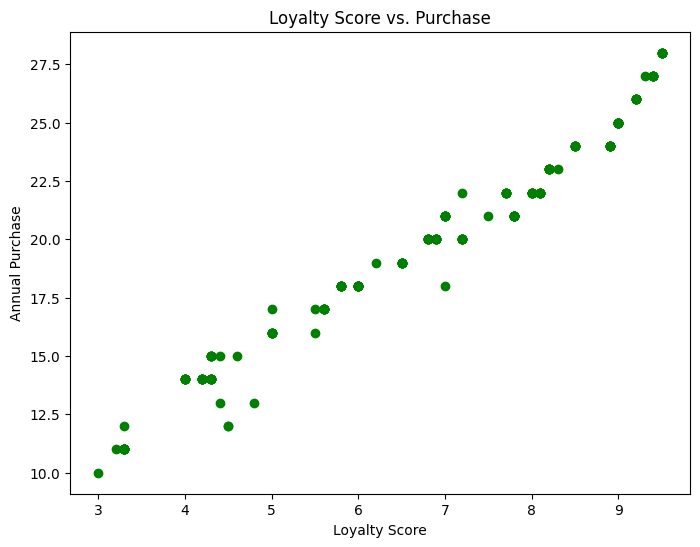

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['loyalty_score'], df['purchase_frequency'], color='green')
plt.title("Loyalty Score vs. Purchase")
plt.xlabel("Loyalty Score")
plt.ylabel("Annual Purchase")
plt.show()
# Insight: This scatter plot reveals the relationship between loyalty and spending.

In [ ]:
df['region'] = df['region'].map({'North':0,'West':1,'South':2, 'East':3})

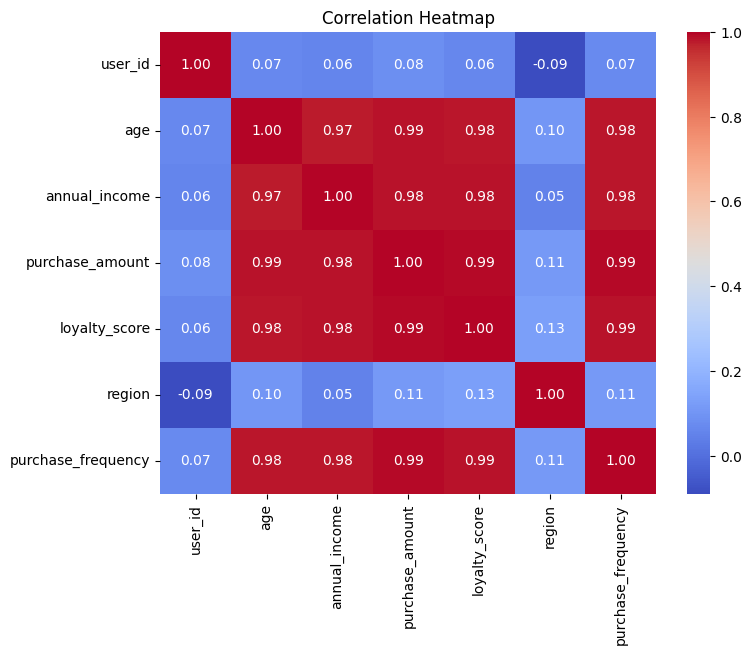

In [ ]:
# (e) Correlation Heatmap among Numeric Attributes
plt.figure(figsize=(8,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Insight: The heatmap shows the pairwise correlations among numerical features.
# For instance, it might reveal if a higher loyalty score correlates with higher annual purchase amounts.

##Model from Scratch

In [ ]:
def train_test_split_scratch(x,y,test_size = 0.3, random_seed = 32):
  """ Parameters:
  This function split dataset into train and test sets.
  Input parameters:
  x: Feature Matrix
  y: Target Matrix
  test_size: Size of Test Set between 0 to 1
  random_seed: Random Seed
  Output Parameters:
  x_train: Feature Matrix Train Set.
  x_test: Feature Matrix Test Set.
  y_train: Target Matrix Train Set.
  y_test: Target Matrix Test Set.
  """
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)

  test_split_size = int(len(x) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  x_train,x_test = x[train_indices],x[test_indices]
  y_train,y_test = y[train_indices],y[test_indices]

  return x_train, x_test, y_train, y_test


In [ ]:
def linear_cost_function(x, y, w):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  cost: accumulated mean square error.
  """
  m = len(y)
  y_pred = np.dot(x, w)
  error = y_pred - y
  cost = (1 / (2 * m)) * np.sum(error ** 2)
  return cost


In [ ]:
def linear_gradient_descent(x, y, w, alpha, iterations):

  cost_history = [0] * iterations

  w_update = w
  m = len(y)
  for iteration in range(iterations):

    y_pred = np.dot(x,w_update)

    loss = y_pred - y

    dw = (1/m) * np.dot(x.T,loss)

    w_update = w_update - alpha * dw

    cost = linear_cost_function(x, y, w_update)
    cost_history[iteration] = cost
  return w_update, cost_history

In [ ]:
def rmse(y, y_pred):

  rmse = np.sqrt(np.mean((y-y_pred)**2))
  return rmse

In [ ]:
def r2(y, y_pred):

  mean_y = np.mean(y)
  ss_tot = np.sum((y - mean_y) ** 2)
  ss_res = np.sum((y - y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

Final Weights: [6.80220966 0.17190011 0.63793575 0.91884981 0.08177685 0.15711611]
Cost History (First 10 iterations): [24.454928713609984, 23.8667623034482, 23.297896897211444, 22.74738155156931, 22.214326672618437, 21.697899615092595, 21.197320607628942, 20.71185897971366, 20.240829667756845, 19.783589979436762]
RMSE on Test Set: 0.17136463650436856
R-Squared on Test Set: 0.9923639361166845


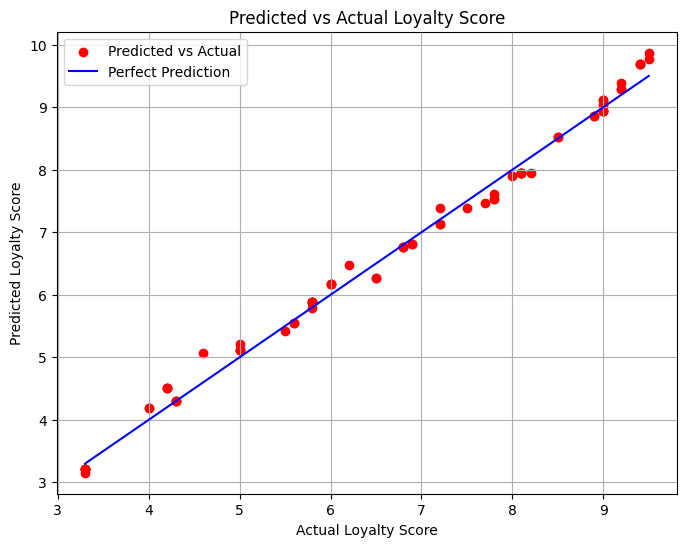

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Concepts of Technology of AI/final assessment/Customer Purchasing Behaviors.csv')

df = df.drop(columns='user_id',axis=1)

df['region'] = df['region'].map({'North': 0, 'West': 1, 'South': 2, 'East': 3})

x = df.drop(labels=['loyalty_score'], axis=1).values
y = df['loyalty_score'].values

scaler = StandardScaler()
x = scaler.fit_transform(x)

x = np.c_[np.ones(x.shape[0]), x]

x_train, x_test, y_train, y_test = train_test_split_scratch(x, y, test_size=0.3)

w = np.zeros((x_train.shape[1]))

alpha = 0.01
iterations = 10000
w_optimal, cost_history = linear_gradient_descent(x_train, y_train, w, alpha, iterations)

y_pred = np.dot(x_test, w_optimal)

model_rmse = rmse(y_test, y_pred)
model_r2 = r2(y_test, y_pred)

print("Final Weights:", w_optimal.ravel())
print("Cost History (First 10 iterations):", cost_history[:10])
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='solid', label='Perfect Prediction')
plt.title("Predicted vs Actual Loyalty Score")
plt.xlabel("Actual Loyalty Score")
plt.ylabel("Predicted Loyalty Score")
plt.legend()
plt.grid(True)
plt.show()

##Primary Model

###Linear Regression from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/drive/MyDrive/Concepts of Technology of AI/final assessment/Customer Purchasing Behaviors.csv")

df = df.drop(columns='user_id',axis=1)

df['region'] = df['region'].map({'North': 0, 'West': 1, 'South': 2, 'East': 3})

x = df.drop(columns=['loyalty_score'])
y = df['loyalty_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
r2_value = r2_score(y_test, y_pred)

print("Final Weights:", lr.coef_)
print("Intercept:", lr.intercept_)
print("RMSE on Test Set:", rmse_value)
print("R-Squared on Test Set:", r2_value)



Final Weights: [ 6.80631731e-03  5.13345979e-05  1.15279546e-02  7.77697723e-02
 -8.19429743e-02]
Intercept: 0.2169918919143301
RMSE on Test Set: 0.17447743707479366
R-Squared on Test Set: 0.9926289095518208


###Random Forest Regression from sklearn

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/drive/MyDrive/Concepts of Technology of AI/final assessment/Customer Purchasing Behaviors.csv")

df = df.drop(columns='user_id',axis=1)

df['region'] = df['region'].map({'North': 0, 'West': 1, 'South': 2, 'East': 3})

x = df.drop(columns=['loyalty_score'])
y = df['loyalty_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE (Random Forest):", rmse_rf)
print("R-Squared (Random Forest):", r2_rf)


RMSE (Random Forest): 0.03732924084711886
R-Squared (Random Forest): 0.9996625950034003


#Hyper-parameter Optimization with Cross-Validation

##Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_lr = {
    'copy_X': [True, False],
    "fit_intercept": [True, False],
    'positive': [True,False]
}

linear_regression_model = LinearRegression()

grid_search_lr = GridSearchCV(estimator=linear_regression_model,
                           param_grid=param_grid_lr,
                           cv=5,
                           n_jobs=-1)

grid_search_lr.fit(x_train, y_train)

print("Best Hyperparameters (Linear Regression):", grid_search_lr.best_params_)
print("Best Score (Linear Regression):", grid_search_lr.best_score_)

best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(x_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_best = r2_score(y_test, y_pred_lr)
print("RMSE (Best Model):", rmse_best)
print("R-squared (Best Model):", r2_best)


Best Hyperparameters (Logistic Regression): {'copy_X': True, 'fit_intercept': False, 'positive': False}
Best Score (Logistic Regression): 0.9887301649221705
RMSE (Best Model): 0.17599463801378126
R-squared (Best Model): 0.9925001588169051


## Random Forest Regression

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(x_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred))
r2_best = r2_score(y_test, y_pred)
print("RMSE (Best Model):", rmse_best)
print("R-squared (Best Model):", r2_best)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Negative MSE): 0.9959491506868053
RMSE (Best Model): 0.03815192582877589
R-squared (Best Model): 0.9996475592440084


#Feature Selection

##Linear Regression

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
n_features_to_select = 4
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

rfe.fit(x_train, y_train)

linear_regression_selected_features = rfe.support_
ranking = rfe.ranking_

x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

model.fit(x_train_rfe, y_train)

y_pred = model.predict(x_test_rfe)
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
r2_value = r2_score(y_test, y_pred)
print(f"Selected Features Mask: {linear_regression_selected_features}")
print(f"Feature Ranking: {ranking}")
print("RMSE on Test Set:", rmse_value)
print("R-Squared on Test Set:", r2_value)

Selected Features Mask: [ True False  True  True  True]
Feature Ranking: [1 2 1 1 1]
RMSE on Test Set: 0.19257436441068146
R-Squared on Test Set: 0.9910205416532799


## Random Forest Regression

In [ ]:
n_features_to_select = 4
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

rfe.fit(x_train, y_train)

random_forest_selected_features = rfe.support_
ranking = rfe.ranking_

x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

model.fit(x_train_rfe, y_train)

y_pred = model.predict(x_test_rfe)
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
r2_value = r2_score(y_test, y_pred)
print(f"Selected Features Mask: {random_forest_selected_features}")
print(f"Feature Ranking: {ranking}")
print("RMSE on Test Set:", rmse_value)
print("R-Squared on Test Set:", r2_value)

Selected Features Mask: [ True  True  True False  True]
Feature Ranking: [1 1 1 2 1]
RMSE on Test Set: 0.044628172733966805
R-Squared on Test Set: 0.9995177509235342


#Final Model

##Linear Regression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concepts of Technology of AI/final assessment/Customer Purchasing Behaviors.csv")

df = df.drop(columns='user_id',axis=1)

df['region'] = df['region'].map({'North': 0, 'West': 1, 'South': 2, 'East': 3})

x = df.drop(columns=['loyalty_score'])
y = df['loyalty_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr = LinearRegression(copy_X = True, fit_intercept = False, positive = False)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
r2_value = r2_score(y_test, y_pred)

print("Final Weights:", lr.coef_)
print("Intercept:", lr.intercept_)
print("RMSE on Test Set:", rmse_value)
print("R-Squared on Test Set:", r2_value)

Final Weights: [ 8.32597724e-03  5.59119594e-05  1.06515033e-02  8.29954050e-02
 -6.86755655e-02]
Intercept: 0.0
RMSE on Test Set: 0.17599463801378126
R-Squared on Test Set: 0.9925001588169051


##Random Forest Regression

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Concepts of Technology of AI/final assessment/Customer Purchasing Behaviors.csv")

df = df.drop(columns='user_id',axis=1)

df['region'] = df['region'].map({'North': 0, 'West': 1, 'South': 2, 'East': 3})

x = df.drop(columns=['loyalty_score'])
y = df['loyalty_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(max_depth= None, max_features= "sqrt", min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE (Random Forest):", rmse_rf)
print("R-Squared (Random Forest):", r2_rf)


RMSE (Random Forest): 0.03815192582877589
R-Squared (Random Forest): 0.9996475592440084


#conclusion


1. Model Performance:
   - The linear regression models achieved an RMSE around 0.175 and R² close to 0.992, while the random forest models consistently outperformed linear regression with an RMSE near 0.038 and R² nearly 0.9996.  
   - Hyper-parameter tuning improved both models, with the optimized random forest and logistic regression showing better or comparable performance to their primary versions.

2. Impact of Methods:
   - Cross-Validation: This technique helped select robust hyperparameters, slightly boosting accuracy and ensuring the models generalize well.  
   - Feature Selection: While reducing the feature set slightly increased the RMSE and lowered R², it provided a more interpretable model with minimal performance loss.

3. Insights and Future Directions:  
   - The results suggest that random forest regression can capture complex patterns more effectively than linear regression on this dataset.  
   - Future work could explore advanced feature engineering, model ensembling (e.g., stacking), and validation on external datasets to further refine predictive performance and robustness.

---


1. Model Performance:
   - The linear regression model built from scratch achieved an RMSE of approximately 0.171 and an R² of about 0.9924, which is very similar to the primary sklearn linear regression model (RMSE 0.1745, R² 0.9926).  
   - In contrast, the random forest regression models—both the primary and the optimized versions—delivered dramatically lower RMSE values (0.037–0.038) and near-perfect R² scores (0.99965), indicating a much closer fit to the data.

2. Impact of Methods:  
   - Hyperparameter Optimization: Slightly refined the models; the tuned linear regression maintained similar performance while the optimized random forest achieved the best overall fit.  
   - Feature Selection: For linear regression, selecting a subset of features resulted in a modest increase in RMSE (to 0.1926) and a drop in R² (to 0.9910), suggesting that even less dominant predictors contributed useful variance. The random forest’s performance was only marginally affected by feature selection.

3. Insights and Future Directions:  
   - Although linear regression performs well on this dataset, the random forest regression clearly outperforms it by capturing more complex (likely nonlinear) relationships.  
   - Future work could focus on combining these approaches (e.g., through ensemble methods or further feature engineering) to balance interpretability with predictive accuracy while also exploring additional data characteristics.